In [ ]:
# Base Libraries
import os
import re

# Install fancyimpute
%pip install fancyimpute
from fancyimpute import SoftImpute

# Scientific libraries
import pandas as pd
import numpy as np
import umap.plot
from sklearn.cluster import KMeans

# Visual libraries
import seaborn as sns
from seaborn import objects as so
import matplotlib.pyplot as plt



print("Set up complete")


[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: C:\Users\86139\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.


C:\Users\86139\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Set up complete


# 1. Impute Missing Values

In [4]:
trainData = pd.read_csv("C:/Users/86139/Desktop/FishTetherExperiment/ProcessedData/trainData.csv")
X_incomplete = trainData.drop(columns=["fishNum", "species"])

In [5]:
X_incomplete.shape

(42242, 427)

In [6]:
X_complete = SoftImpute(shrinkage_value=10, max_rank=50, max_iters=1, ).fit_transform(X_incomplete)
X_complete = pd.DataFrame(X_complete, columns=X_incomplete.columns).reset_index()

C:\Users\86139\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\86139\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\86139\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[SoftImpute] Max Singular Value of X_init = 8308593.791135
[SoftImpute] Iter 1: observed MAE=1.926727 rank=50
[SoftImpute] Stopped after iteration 1 for lambda=10.000000


In [26]:
# Is there still any null present?
X_complete.isna().sum()

index         0
Unnamed: 0    0
F45           0
F45.5         0
F46           0
             ..
F258          0
F258.5        0
F259          0
F259.5        0
F260          0
Length: 428, dtype: int64

In [19]:
trainDataComplete = pd.concat([trainData[["fishNum", "species"]], X_complete], axis=1)
trainDataComplete.drop(columns=["index","Unnamed: 0"], inplace=True)

# 2. Visualize Variability of Frequency Response Curves Within An Individual

C:\Users\86139\AppData\Local\Temp\ipykernel_26692\1148116639.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fishData.drop(columns=["fishNum", "species"], inplace=True)


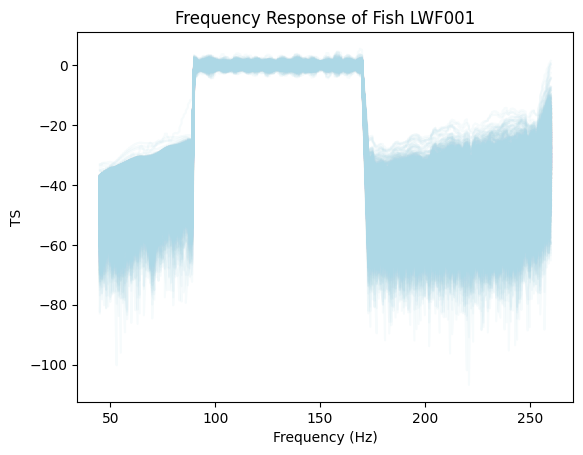

In [52]:
def freqRespByFish(fishNum, data):
    '''
    This function plots all frequency responses at different time points of a fish
    '''
    fishData = data[data["fishNum"] == fishNum]
    x = fishData.columns[2:].str.extract(r'(\d+)').astype(int)
    fishData.drop(columns=["fishNum", "species"], inplace=True)

    for i in range(len(fishData)):
        y = fishData.iloc[i,]
        plt.plot(x, y, color="lightblue", alpha=0.1)

    plt.xlabel("Frequency (Hz)")
    plt.ylabel("TS")
    plt.title("Frequency Response of Fish {}".format(fishNum))
    plt.show()

freqRespByFish("LWF001", trainDataComplete)

C:\Users\86139\AppData\Local\Temp\ipykernel_26692\1148116639.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fishData.drop(columns=["fishNum", "species"], inplace=True)


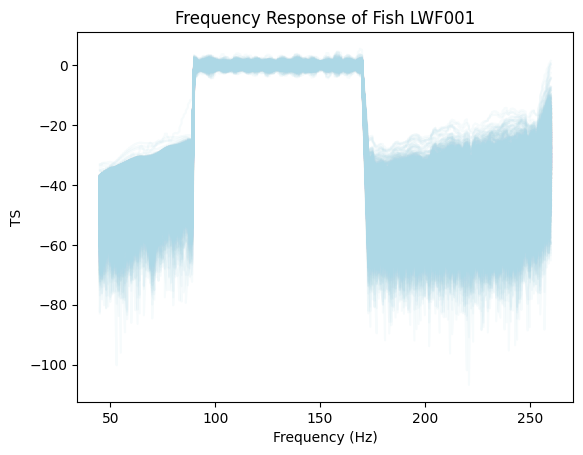

C:\Users\86139\AppData\Local\Temp\ipykernel_26692\1148116639.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fishData.drop(columns=["fishNum", "species"], inplace=True)


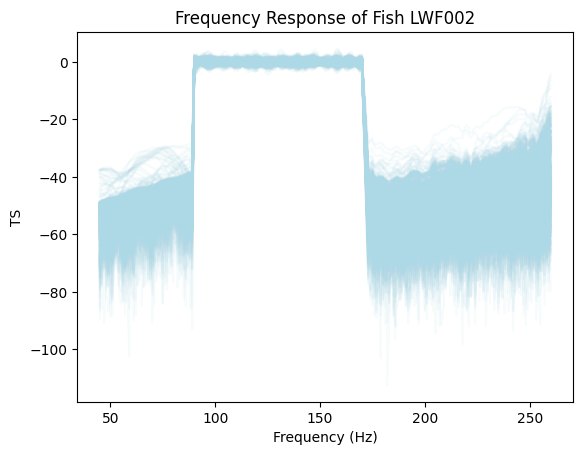

C:\Users\86139\AppData\Local\Temp\ipykernel_26692\1148116639.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fishData.drop(columns=["fishNum", "species"], inplace=True)


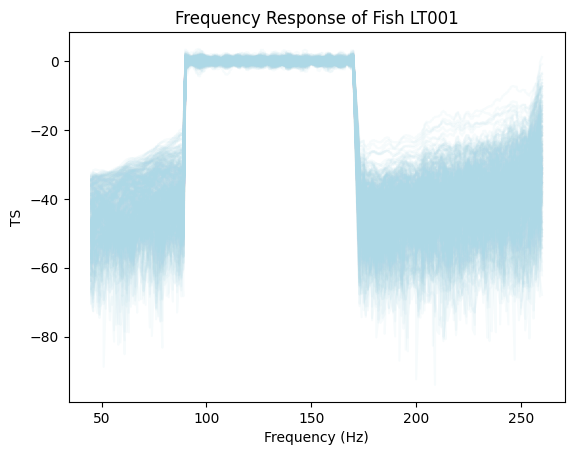

C:\Users\86139\AppData\Local\Temp\ipykernel_26692\1148116639.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fishData.drop(columns=["fishNum", "species"], inplace=True)


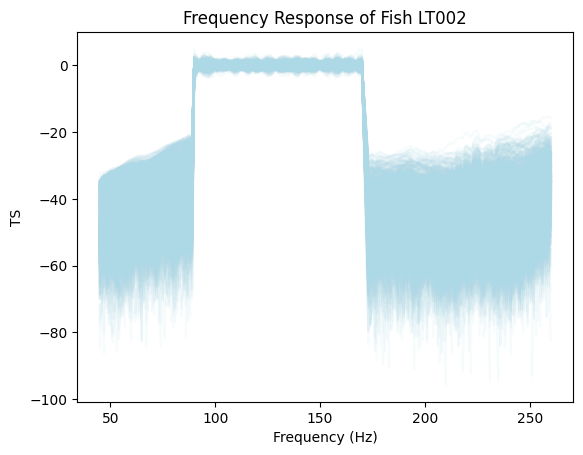

C:\Users\86139\AppData\Local\Temp\ipykernel_26692\1148116639.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fishData.drop(columns=["fishNum", "species"], inplace=True)


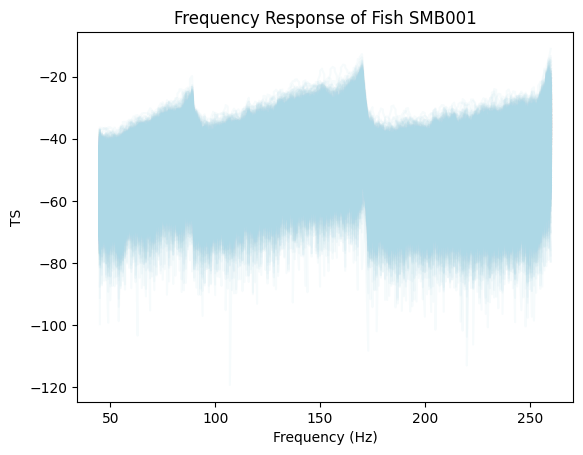

C:\Users\86139\AppData\Local\Temp\ipykernel_26692\1148116639.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fishData.drop(columns=["fishNum", "species"], inplace=True)


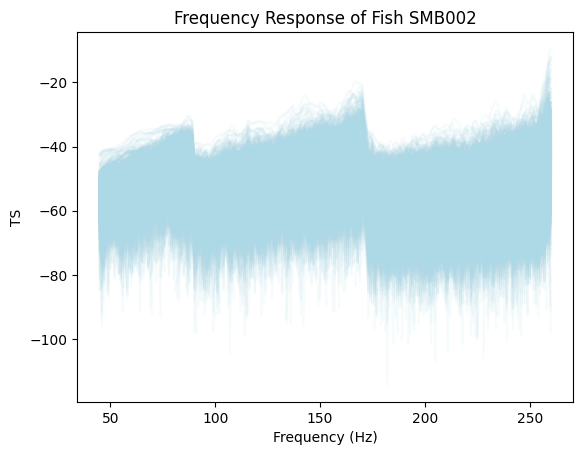

In [61]:
fishList = ["LWF001", "LWF002", "LT001", "LT002", "SMB001", "SMB002"]

# fig, axs = plt.subplots(2, 3, figsize=(15, 10))
for i, fish in enumerate(fishList):
    freqRespByFish(fish, trainDataComplete)

C:\Users\86139\AppData\Local\Temp\ipykernel_26692\1148116639.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fishData.drop(columns=["fishNum", "species"], inplace=True)


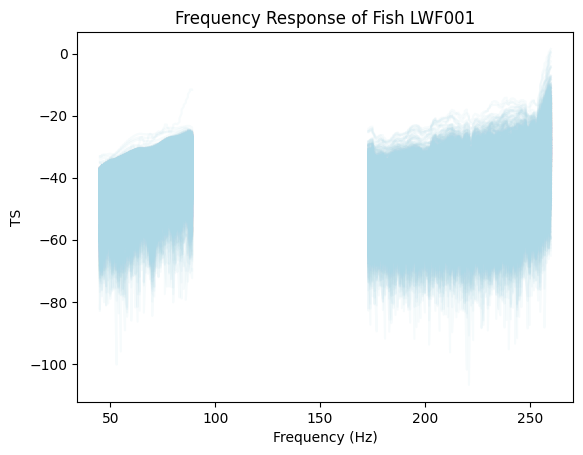

C:\Users\86139\AppData\Local\Temp\ipykernel_26692\1148116639.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fishData.drop(columns=["fishNum", "species"], inplace=True)


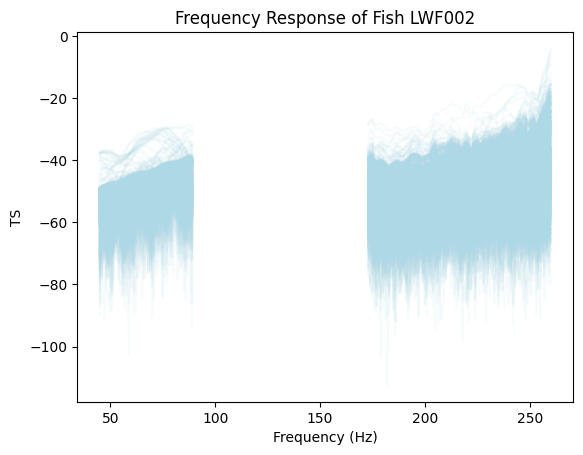

C:\Users\86139\AppData\Local\Temp\ipykernel_26692\1148116639.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fishData.drop(columns=["fishNum", "species"], inplace=True)


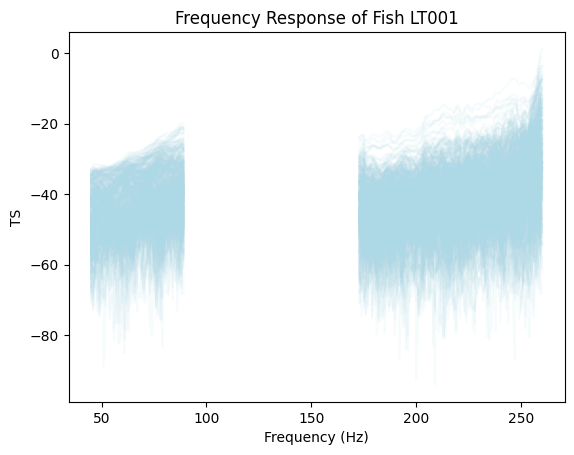

C:\Users\86139\AppData\Local\Temp\ipykernel_26692\1148116639.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fishData.drop(columns=["fishNum", "species"], inplace=True)


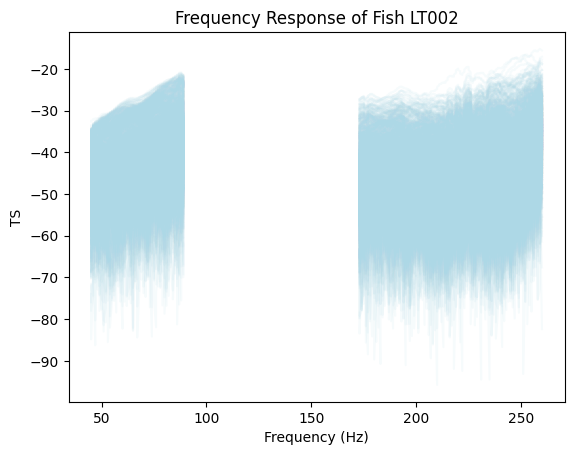

C:\Users\86139\AppData\Local\Temp\ipykernel_26692\1148116639.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fishData.drop(columns=["fishNum", "species"], inplace=True)


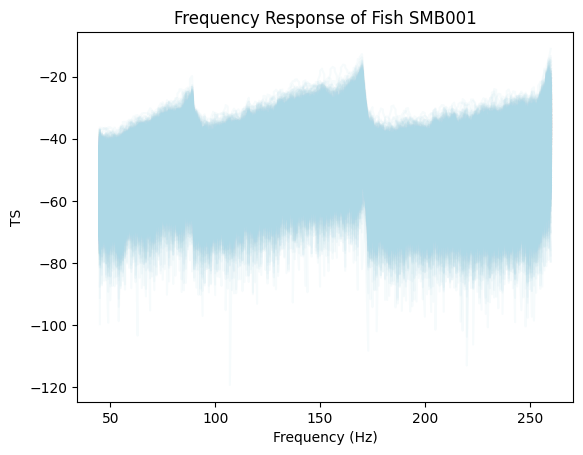

C:\Users\86139\AppData\Local\Temp\ipykernel_26692\1148116639.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fishData.drop(columns=["fishNum", "species"], inplace=True)


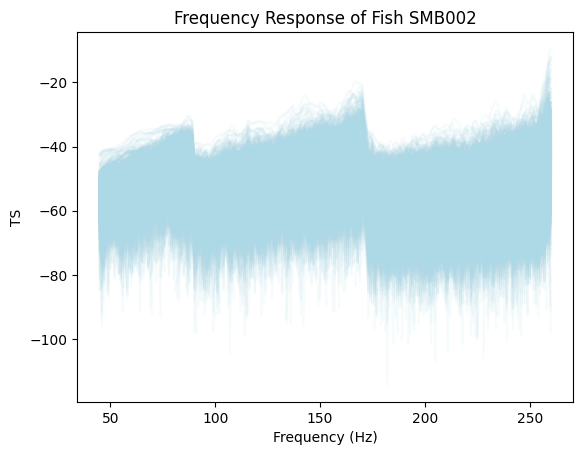

In [67]:
# Also try on unimputed data
for i, fish in enumerate(fishList):
    freqRespByFish(fish, trainData)

# 3. Run UMAP

C:\Users\86139\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


<Axes: >

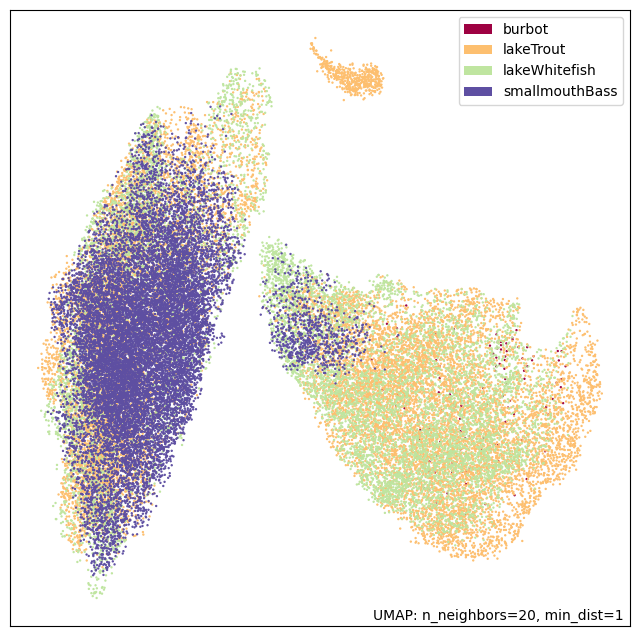

In [ ]:
## Try 2D UMAP plotting
mapper = umap.UMAP(n_components=2, metric="euclidean", 
                   min_dist=1, n_neighbors=20).fit(trainDataComplete.drop(columns=["fishNum", "species"]))
umap.plot.points(mapper, labels=trainDataComplete["species"])